# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 2**

**Número do Grupo:**

**Alunos:**
1. Gabriel de Avelar Las Casas Rebelo (11800462)
2. Renan de Almeida Leandro (11801157)

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`.
- Análise de correlações entre variáveis e sua interpretação para a limpeza de datasets.
- Utilização de métodos de imputação de valores faltantes com a biblioteca `scikit-learn`.
- Transformação de variáveis categóricas utilizando a biblioteca `scikit-learn`.

---

Para os exercícios de **1** a **6**, utilizaremos o dataset **hepatitis.csv**.  A célula de código a seguir realizará o download destes dois datasets para o ambiente virtual do Google Colab.


In [ ]:
# Download dos datasets para o ambiente virtual.
!wget -O hepatitis.csv "https://drive.google.com/uc?export=download&id=1hYkarxPr0snIl-W7VWM9OxZdsOfuUwsU"


--2023-09-14 19:03:08--  https://drive.google.com/uc?export=download&id=1hYkarxPr0snIl-W7VWM9OxZdsOfuUwsU
Resolving drive.google.com (drive.google.com)... 172.253.63.113, 172.253.63.138, 172.253.63.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jr4pnd6g4edrvh4vbltsnjrcumvpnuee/1694718150000/17263126637575785733/*/1hYkarxPr0snIl-W7VWM9OxZdsOfuUwsU?e=download&uuid=bc32caaf-d809-4c6b-9fc5-11e9ec33e0d1 [following]
--2023-09-14 19:03:09--  https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jr4pnd6g4edrvh4vbltsnjrcumvpnuee/1694718150000/17263126637575785733/*/1hYkarxPr0snIl-W7VWM9OxZdsOfuUwsU?e=download&uuid=bc32caaf-d809-4c6b-9fc5-11e9ec33e0d1
Resolving doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.googleusercontent.com)... 172.253.122.132, 2607

## Dataset **hepatitis.csv**

### Questão 01.

Carregue o dataset **hepatitis.csv** (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values='?'`.

In [ ]:
# Imports
import pandas as pd

# Code
hepatitis = pd.read_csv('hepatitis.csv', na_values='?')
hepatitis.head()
#print(hepatitis.info())

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1.0,85.0,18.0,4.0,NaN,no,1
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,1
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96.0,32.0,4.0,NaN,no,1
3,31,female,NaN,yes,no,no,no,yes,no,no,no,no,no,0.7,46.0,52.0,4.0,80.0,no,1
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1.0,NaN,200.0,4.0,NaN,no,1


---
### Questão 02.
Realize uma análise exploratória inicial do dataset fornecido.

Para isso, você deve:

 - Apresente a quantidade de valores faltantes para cada variável do dataset.
 - Identifique o tipo de dado de cada uma das variáveis (se são numéricas ou categóricas).


> **ATENÇÃO: O pandas pode importar as variáveis com os tipos incorretos!**


In [ ]:
print('Numero de elementos nulos')
print(hepatitis.isnull().sum())
print('------------------------------')
print('Tipos de elementos por coluna')
answer = """
AGE                 numérico
SEX                 categórico
STEROID             categórico
ANTIVIRALS          categórico
FATIGUE             categórico
MALAISE             categórico
ANOREXIA            categórico
LIVER_BIG           categórico
LIVER_FIRM          categórico
SPLEEN_PALPABLE     categórico
SPIDERS             categórico
ASCITES             categórico
VARICES             categórico
BILIRUBIN           numérico
ALK_PHOSPHATE       numérico
SGOT                numérico
ALBUMIN             numérico
PROTIME             numérico
HISTOLOGY           categórico
Class               categórico
"""
print(answer)

Numero de elementos nulos
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
Class               0
dtype: int64
------------------------------
Tipos de elementos por coluna

AGE                 numérico
SEX                 categórico
STEROID             categórico
ANTIVIRALS          categórico
FATIGUE             categórico
MALAISE             categórico
ANOREXIA            categórico
LIVER_BIG           categórico
LIVER_FIRM          categórico
SPLEEN_PALPABLE     categórico
SPIDERS             categórico
ASCITES             categórico
VARICES             categórico
BILIRUBIN           numérico
ALK_PHOSPHATE       numérico




---

### Questão 03.

Realize o pré-processamento do dataset fornecido.

Para isso, você deve:


-   **Para as variáveis numéricas:** substitua os valores faltantes utilizando a estratégia de **média** (`sklearn.impute.SimpleImputer`).
-   **Para as variáveis categóricas:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`).

Por fim, apresente os resultados, comprovando que a imputação e transformações foram feitas corretamente.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

#fazendo uma copia para nao modificar o original
df = hepatitis.copy()

#estabelcendo a forma de imputação
imputernum = SimpleImputer(missing_values= np.nan, strategy='mean')
imputercat = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

#lista de valores a serem imputados
numeric_variables = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
categorics_variables = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY', 'Class']

df[numeric_variables] = imputernum.fit_transform(hepatitis[numeric_variables])
df[categorics_variables] = imputercat.fit_transform(hepatitis[categorics_variables])

print(df)

      AGE     SEX STEROID ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER_BIG  \
0    30.0    male      no         no      no      no       no        no   
1    50.0  female      no         no     yes      no       no        no   
2    78.0  female     yes         no     yes      no       no       yes   
3    31.0  female     yes        yes      no      no       no       yes   
4    34.0  female     yes         no      no      no       no       yes   
..    ...     ...     ...        ...     ...     ...      ...       ...   
150  46.0  female     yes         no     yes     yes      yes       yes   
151  44.0  female     yes         no     yes      no       no       yes   
152  61.0  female      no         no     yes     yes       no        no   
153  53.0    male      no         no     yes      no       no       yes   
154  43.0  female     yes         no     yes      no       no       yes   

    LIVER_FIRM SPLEEN_PALPABLE SPIDERS ASCITES VARICES  BILIRUBIN  \
0           no              no


---

### Questão 04.

Calcule a matriz de correlação somente das variáveis numericas. Determine quantas variáveis poderemos descartar e identifique quais são elas.

                    AGE  BILIRUBIN  ALK_PHOSPHATE      SGOT   ALBUMIN  \
AGE            1.000000   0.122884       0.008076  0.081052 -0.246169   
BILIRUBIN      0.122884   1.000000       0.157982  0.232610 -0.370712   
ALK_PHOSPHATE  0.008076   0.157982       1.000000  0.193969 -0.338158   
SGOT           0.081052   0.232610       0.193969  1.000000 -0.115455   
ALBUMIN       -0.246169  -0.370712      -0.338158 -0.115455  1.000000   
PROTIME       -0.153312  -0.220977      -0.189331 -0.137698  0.301497   

                PROTIME  
AGE           -0.153312  
BILIRUBIN     -0.220977  
ALK_PHOSPHATE -0.189331  
SGOT          -0.137698  
ALBUMIN        0.301497  
PROTIME        1.000000  


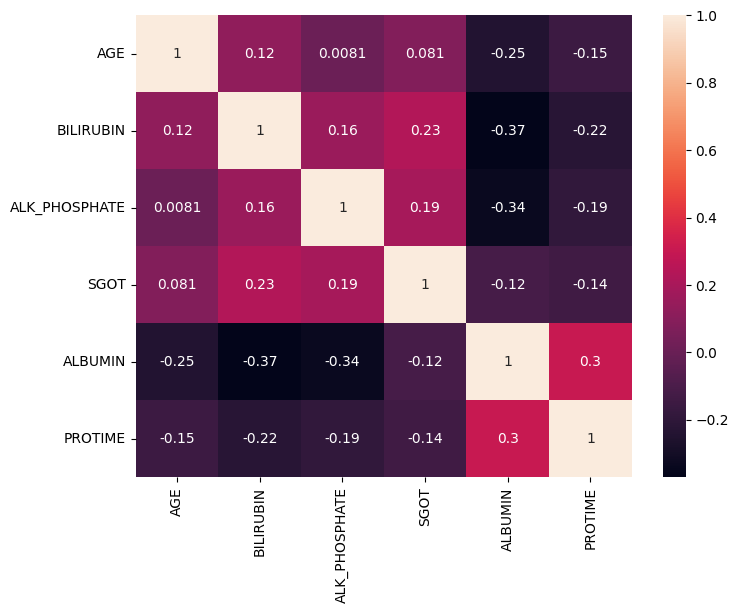

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = df[numeric_variables].corr(method='pearson')
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.show()


## Resposta: Podemos perceber que as variáveis ALBUMIN e PROTIME são as que tem menor correlação com as outras variáveis, tendo uma correlação alta apenas mutualmente entre si



---

### Questão 05.

Determine as 10 variáveis com menor correlação com a variável `Class` (`pandas.DataFrame.corr`).

Caso queiramos estudar a relação da variável `Class` com as outras variáveis, por que seria interessante desconsiderar essas 10 variáveis identificadas?

> Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização.

<ipython-input-19-2f68fe236fd5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlation = df[numeric_variables].corr()


                    AGE  BILIRUBIN  ALK_PHOSPHATE      SGOT   ALBUMIN  \
AGE            1.000000   0.122884       0.008076  0.081052 -0.246169   
BILIRUBIN      0.122884   1.000000       0.157982  0.232610 -0.370712   
ALK_PHOSPHATE  0.008076   0.157982       1.000000  0.193969 -0.338158   
SGOT           0.081052   0.232610       0.193969  1.000000 -0.115455   
ALBUMIN       -0.246169  -0.370712      -0.338158 -0.115455  1.000000   
PROTIME       -0.153312  -0.220977      -0.189331 -0.137698  0.301497   

                PROTIME  
AGE           -0.153312  
BILIRUBIN     -0.220977  
ALK_PHOSPHATE -0.189331  
SGOT          -0.137698  
ALBUMIN        0.301497  
PROTIME        1.000000  


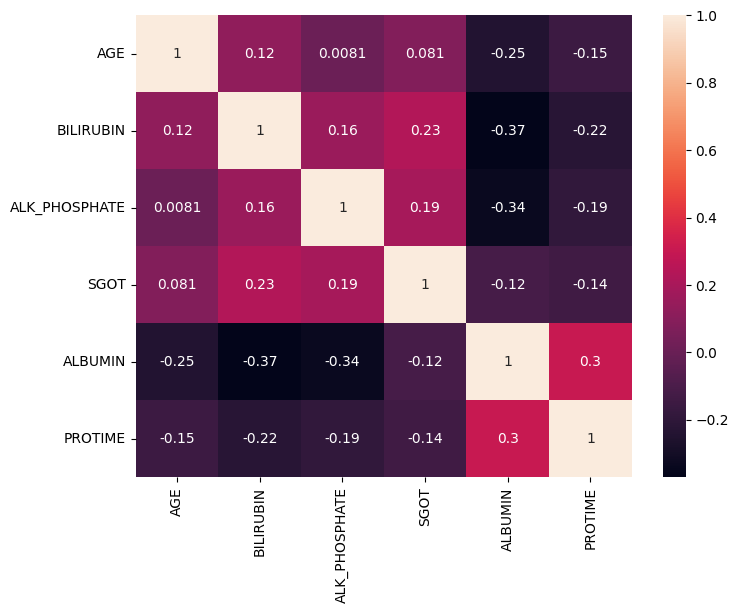

In [ ]:
#considerando class como numerico
numeric_variables = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'Class']

new_correlation = df[numeric_variables].corr()
print(new_correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(new_correlation, annot=True)
plt.show()

## Resposta: As variáveis com as quais o "Class" tem menos relação são "AGE", "ALK_PHOSPHATE" e "SGOT". Para uma análise exclusiva do Class,seria interessante desconsiderar essas, justamente por nao apresentarem um peso estatistico muito forte, poluindo, portanto, o gráfico



---

### Questão 06.

Com as 10 varíaveis identificadas na questão anterior, crie um novo dataset que não contenha essas 10 váriaveis.

Apresente as 5 primeiras linhas do novo dataset criado.

> Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays.

In [ ]:
new = df.copy()

del new['AGE']
del new['ALK_PHOSPHATE']
del new['SGOT']

new.head()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALBUMIN,PROTIME,HISTOLOGY,Class
0,male,no,no,no,no,no,no,no,no,no,no,no,1.0,4.0,61.852273,no,1
1,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,3.5,61.852273,no,1
2,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,4.0,61.852273,no,1
3,female,yes,yes,no,no,no,yes,no,no,no,no,no,0.7,4.0,80.000000,no,1
4,female,yes,no,no,no,no,yes,no,no,no,no,no,1.0,4.0,61.852273,no,1
